# Modules

This notebook aims to generate outputs for all callable modules within this package, note the speed for 1-2 chosen examples and plot information that are returned. 

In [1]:
import hazards
import time
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point, Polygon, MultiLineString
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Peebles Example 
north = 55.6658  # North latitude
south = 55.6372  # South latitude
east = -3.1651   # East longitude
west = -3.2116   # West longitude

buffer = 0.005

#Exeter
name = 'Exeter'

geotiff_file = 'Peebles-30m-DEM.tif'

## River Modules

### .river_list

This returns a list of the river, their locations and and OSMid. This also returns the polygon associated with the chosen region. 
If a buffer is specified this will also return the buffered polygon as well 

In [8]:
#st = time.perf_counter()
river, polygon, buffered_polygon = hazards.river_list('ខេត្តកំពង់ចាម', buffer = buffer)
#river, polygon, buffered_polygon = hazards.river_list(name, buffer=buffer)
#et = time.perf_counter()
#print(f'Time taken={et-st}seconds')

Processing rivers in: ខេត្តកំពង់ចាម
6 Unique Rivers Extracted:
       ទន្លេតូច
       Peam Chi Kang
       ទន្លេ​មេគង្គ
       ស្ទឹងជីនិត
       Prek Peam Chileang
       Stueng Boeung Phtea


In [9]:
river, polygon, buffered_polygon = hazards.river_list('Banjarmasin', buffer = buffer)

Processing rivers in: Banjarmasin
60 Unique Rivers Extracted:
       Sungai Martapura
       Sungai Alalak
       Sungai Pelambuan
       Sungai Jagad Baya
       Sungai Pangeran
       Sungai Saka Permai
       Sungai Anak Pelambuan Kanan
       Sungai Pengambangan
       Sungai Anak Pelambuan Kiri
       Sungai Banyiur
       Sungai Sugaling
       Anak Sungai Banyiur
       Sungai Gardu
       Sungai Bilu
       Sungai Kelayan
       Sungai Tatah Belayung
       Sungai Guring
       Sungai Tatah Mesjid
       Sungai Pemurus
       Antasan Segera
       Sungai Simpang Tangga
       Sungai Pandai
       Sungai Banyiur Utara
       Sakaban Pasar
       Sungai Anak Pangeran KI 1
       Sungai Anak Pangeran KI 2
       Sungai Bagau
       Bagau Kiri
       Kelayan Kecil
       Sungai Sipai
       Sungai Kuripan
       Laksana Intan
       Sungai Anak Miai
       Sungai Simpang Jelai
       Sungai Miai
       Sungai Kindaung
       Sungai Gampa
       Sungai Halinau
       Sungai Kuin Kec

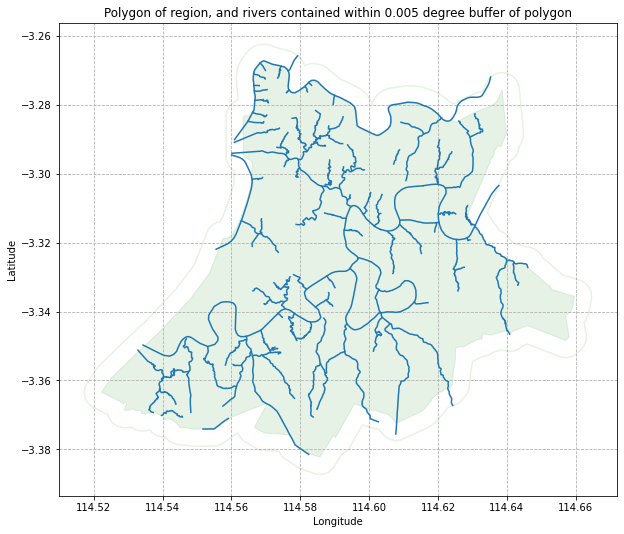

In [10]:
fig, ax = plt.subplots(figsize =(10,10))

for geom in river['new geometry']:
    if isinstance(geom, MultiLineString):
        # If it's a MultiLineString, use the `geoms` property to iterate through LineStrings
        for line in geom.geoms:
            x, y = line.coords.xy
            ax.plot(x, y, color='tab:blue')
    elif isinstance(geom, LineString):
        # If it's a LineString, plot it directly
        x, y = geom.coords.xy
        ax.plot(x, y, color='tab:blue')

# Plot the polygon

x, y = polygon.exterior.xy
ax.fill(x, y, alpha=0.1, color='green')

x, y = buffered_polygon.exterior.xy
ax.plot(x, y, alpha = 0.1, color = 'green', linestyle = '-')

#plt.title(f'Polygon of {name}, and rivers contained within {buffer} degree buffer of polygon')
plt.title(f'Polygon of region, and rivers contained within {buffer} degree buffer of polygon')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(linestyle = '--')
plt.gca().set_aspect('equal')

# Show the plot
plt.show()

To switch between the river plot for Peebles and Exeter and any other location, the lines in the above box can be toggled or the north, south, east, west and name values can be changed above. 

Examples to try: 
- Peterborough (England)
- 경안동 (South Korea)
- 官渡区 (China)
- Maseru District (Lesotho)
- Panajachel (Guatemala)
- Партызанскі раён (Belarus)
- ខេត្តកំពង់ចាម (Cambodia) 

### WARNING: there are limits to the size that the location can be. Too large will crash this notebook. The region for the river information can be larger than the buildings, however there is still a limit to the area size

==================================================================================================================
### .river_elevation

This returns the river list file containing the geometry of each point, the name of each river section, new geometries after the buffer has been applied and the elevation of each point of the river. 

This will only work for regions within the given geotiff region (approximately Scottish bounders)

In [11]:
st = time.perf_counter()
river = hazards.river_elevation(geotiff_file, north, south, east, west, buffer = buffer)

et = time.perf_counter()
print(f'Time taken={et-st}seconds')

Processing rivers in lat long grid
2 Unique Rivers Extracted:
       River Tweed
       Eddleston Water
Time taken=0.19677829719148576seconds


In [12]:
river

geometry  \
element_type osmid                                                          
way          116045681  LINESTRING (-3.19288 55.65039, -3.19217 55.650...   
             156508065  LINESTRING (-3.37671 55.60351, -3.37327 55.604...   
             765770146  LINESTRING (-3.20740 55.75161, -3.20737 55.751...   

                                   name  \
element_type osmid                        
way          116045681      River Tweed   
             156508065      River Tweed   
             765770146  Eddleston Water   

                                                             new geometry  \
element_type osmid                                                          
way          116045681  LINESTRING (-3.192884 55.6503853, -3.1921712 5...   
             156508065  LINESTRING (-3.2165999999999997 55.65171836073...   
             765770146  LINESTRING (-3.2031028441763736 55.6708, -3.20...   

                                                             km distances  \
element_type osmid                                                          
way          116045681  LINESTRING (355.03250216458525 6182.8192051015...   
             156508065  LINESTRING (357.66960104488754 6182.8894303229...   
             765770146  LINESTRING (356.16878579316926 6185.0534728237...   

                                                               elevations  
element_type osmid                                                         
way          116045681  [161, 160, 160, 162, 158, 163, 164, 162, 161, ...  
             156508065  [166, 169, 179, 178, 181, 181, 166, 166, 167, ...  
             765770146  [169, 170, 170, 167, 167, 167, 167, 167, 167, ...

Examples to try: 
- Galashiels
- Midlothian
- West Lothian
- Scottish Borders
- lat lon box within the given region


=========================================================================== 
----

## Building Modules

Building areas have a smaller limit to the maximum size as it contains more information per area in urban regions. 

### .building_plot

Processing plot: Exeter


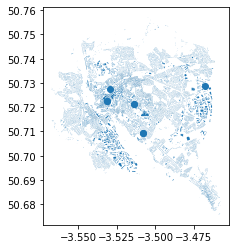

Time taken=26.35291684512049seconds


In [13]:
st = time.perf_counter()
hazards.building_plot(name)
#hazards.building_plot(north, south, east, west)

et = time.perf_counter()
print(f'Time taken={et-st}seconds')

This returns of plot of the buildings within the chosen area. This helps to show the size and distribution of the buildings but is not in and of itself used for analysis. However it is a helpful visual for a chosen area, as well as a quick way to determine how well Open Street Maps has mapped the region.

Examples to try: 
- 경안동 (South Korea)
- 官渡区 (China)
- Peterborough (England)
- ⴱⴻⵔⴵ ⵍⴱⴻⵃⵔⵉ (Algeria)
- Batas Dusun Lendang Ara 3 (Indonesia)

====================================================================================================================
### .building_pieplot

This shows the pie chart distribution of the building types in a given area. The number of building types within the piechart and barchart can be specified but they are automatically set to 9 and 20.

Processing plot: 官渡区
number of yes 0    1
1    1
dtype: int64
Time taken=1.1156782479956746seconds


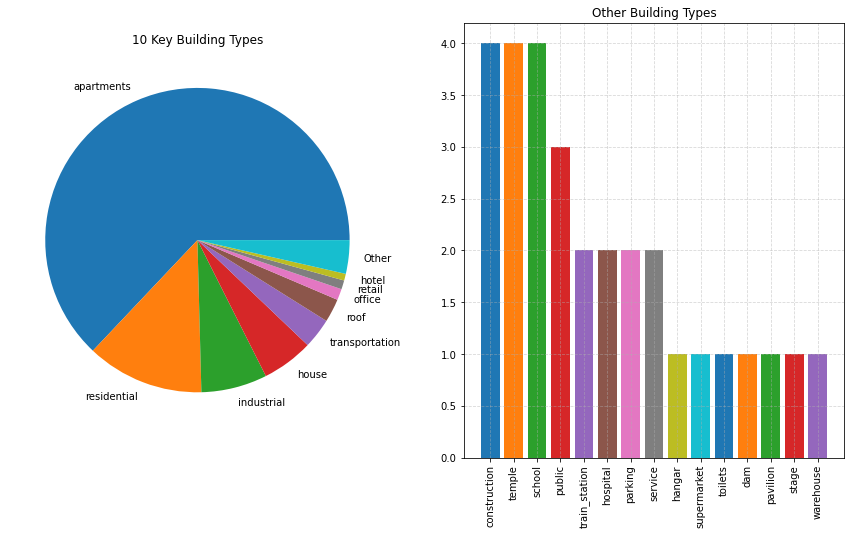

In [14]:
st = time.perf_counter()
hazards.building_pieplot('官渡区')

et = time.perf_counter()
print(f'Time taken={et-st}seconds')

Some regions do not work due to not having buildings specified as 'type' (경안동, Batas Dusun Lendang Ara 3, etc.)

This relates to the information within the OSM system. South Korea for example is known to limit the information on buildings that is held by companies outside of the country. Google maps for example has poor information on South Korean building types in comparison to the countries more commonly used Naver maps. Things like this show a limitation of the OSM data and are important to be aware of through the use of this package. 

====================================================================================================================
### .building_treemap

Treemaps in this package show the same information as the above pie chart, however show it in a more interpretable way. 

In [15]:
#st = time.perf_counter()
#hazards.building_treemap(north, south, east, west)

#et = time.perf_counter()
#print(f'Time taken={et-st}seconds')

====================================================================================================================
### .building_buffer

This returns the buffer of the region (this can be simply a buffer from the river or a cut buffer between two distances). It then plots the same piechart as above, again which alterable numbers of catergories in each plot

In [ ]:
st = time.perf_counter()
b = hazards.buffered_buildings('Panajachel', inner_distance= 0.002, buffer_distance= 0.01, m=10) #, buffer_distance= None, inner_distance=0.003) <-- INNER ADDS SEC LIST

et = time.perf_counter()
print(f'Time taken={et-st}seconds')

====================================================================================================================
### .building_elev

This returns a similar result to .river_elevation, however with the building absolute elevation as well as the buildings relative elevation to the closest river point. Again, this can only be completed for regions within the DEM dataset. Here it is the Scottish Borders. 

In [17]:
buildings = hazards.building_elev(geotiff_file, north, south, east, west)

Processing rivers in lat long grid
2 Unique Rivers Extracted:
       River Tweed
       Eddleston Water


/home/s1929650/5_YEAR/hazards 2/hazards/building/building_elev.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings['relative elevation'].iloc[i] = rel_elev


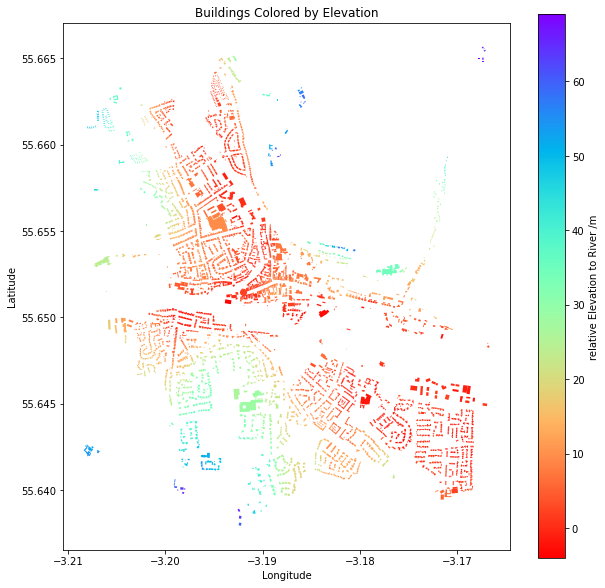

In [18]:
#Plot
colourmap = np.arange(buildings['relative elevation'].min(), buildings['relative elevation'].max(), 1)
cmap = plt.get_cmap('rainbow_r')

fig, ax = plt.subplots(figsize=(10, 10))

buildings.plot(column='relative elevation', cmap=cmap, ax=ax)

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Buildings Colored by Elevation')

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(colourmap)  
cbar = plt.colorbar(sm, ax=ax, label='relative Elevation to River /m')


# Display the plot
plt.show()

Examples to try:
- Galashiels
- south = 55.5395, west = -2.864486, north = 55.5595, east = -2.820198 (Selkirk)

====================================================================================================================
.building_dis

Processing rivers in: 官渡区
9 Unique Rivers Extracted:
       盘龙江
       明通河
       宝象河
       金汁河
       老盘龙江
       正大河
       马料河
       广普河
       小清河


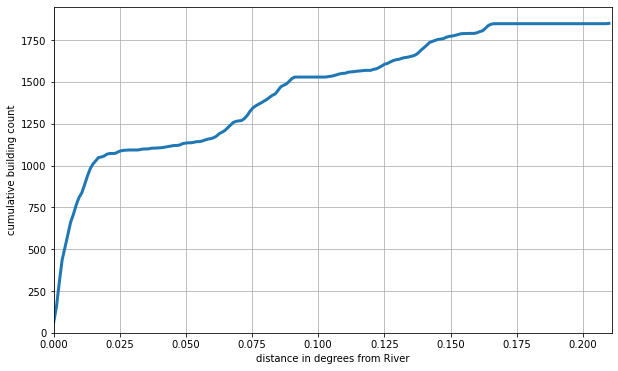

In [19]:
build = hazards.building_dis('官渡区')

========================================================================== 
----



## Earthquake Module

### .earthquake_buffer

This plots the distance buffers away from a chosen lat lon location of the epicentre of a simple earthquake. If no aregument is given for the location it is set to the middle of the region given. 

Processing lat long grid


/home/s1929650/5_YEAR/hazards 2/hazards/earthquake/earthquake_buffer.py:62: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  buffer.plot(ax=ax,color='tab:orange', alpha = 0.1, linewidth=1, edgecolor = 'tab:red')
/home/s1929650/.local/lib/python3.10/site-packages/geopandas/geoseries.py:628: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)
/home/s1929650/.local/lib/python3.10/site-packages/geopandas/geoseries.py:628: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)
/hom

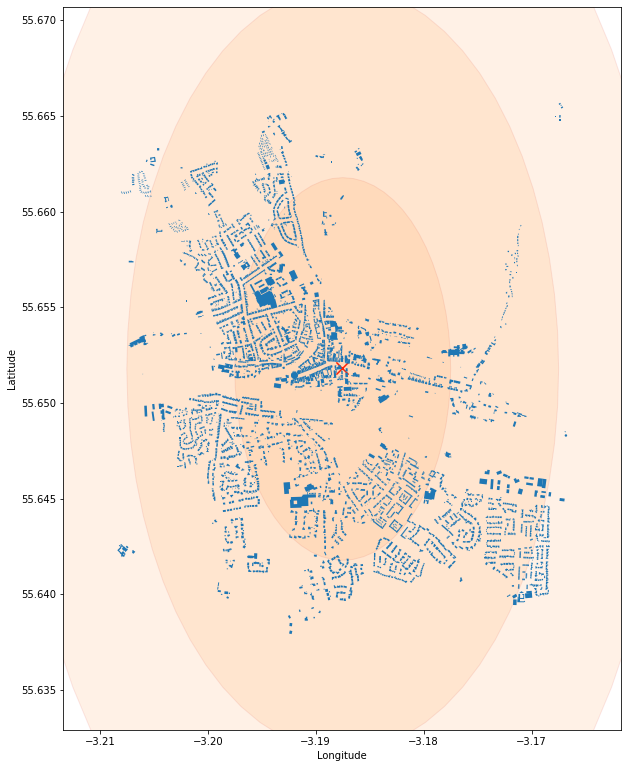

In [7]:
hazards.earthquake_buffer(north, south, east, west)